In [1]:
%pip install pandas numpy networkx matplotlib pyvis graphviz
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


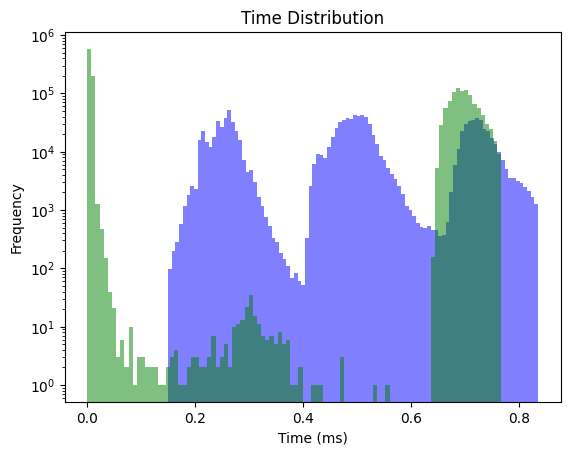

In [2]:
jl_df = pd.read_csv('data/jl_time.csv')
jl_df['time'] = jl_df['time'][jl_df['time'] < np.percentile(jl_df['time'], 99)]

py_df = pd.read_csv('data/py_time.csv')
py_df['time'] = py_df['time'][py_df['time'] < np.percentile(py_df['time'], 99)]

cpp_df = pd.read_csv('data/cpp_time.csv')
cpp_df['time'] = cpp_df['time'][cpp_df['time'] < np.percentile(cpp_df['time'], 99)]


plt.hist(jl_df['time'], bins=100, log=True, alpha=0.5, color='red')
plt.hist(py_df['time'], bins=100, log=True, alpha=0.5, color='blue')
plt.hist(cpp_df['time'], bins=100, log=True, alpha=0.5, color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.title('Time Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

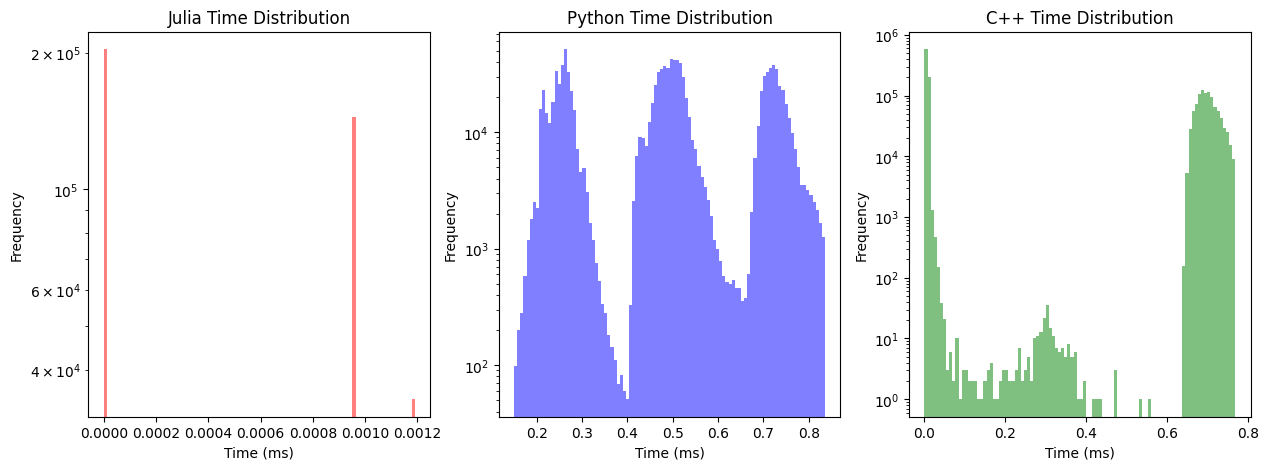

In [3]:
# 3x1 subplot of 3 different times 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(jl_df['time'], bins=100, log=True, alpha=0.5, color='red')
ax[0].set_title('Julia Time Distribution')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Frequency')

ax[1].hist(py_df['time'], bins=100, log=True, alpha=0.5, color='blue')
ax[1].set_title('Python Time Distribution')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Frequency')

ax[2].hist(cpp_df['time'], bins=100, log=True, alpha=0.5, color='green')
ax[2].set_title('C++ Time Distribution')
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

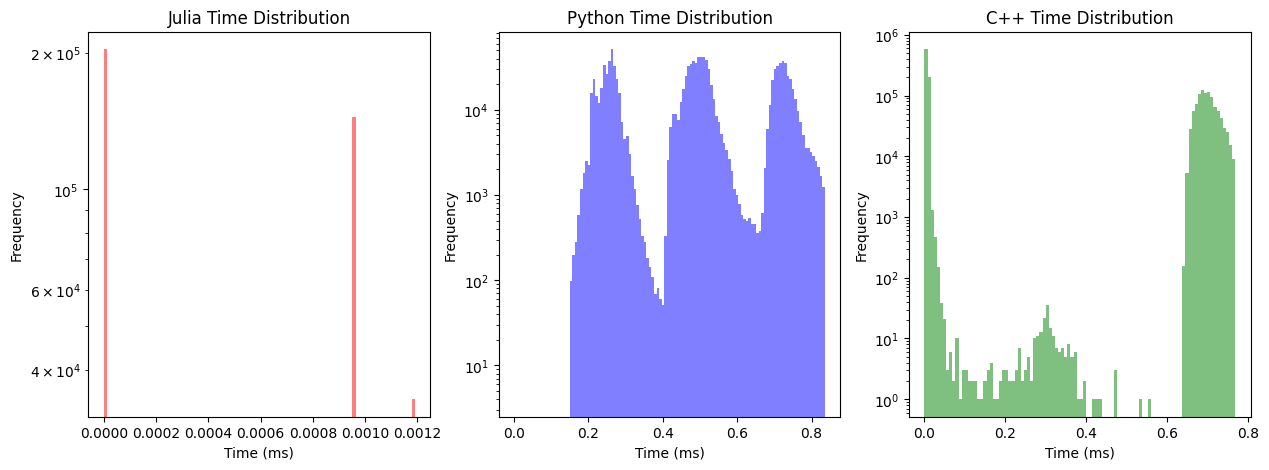

In [4]:
py_t_real = pd.read_csv('data/py_t_real.csv')
py_t_real['time'] = py_t_real['time'][py_t_real['time'] < np.percentile(py_t_real['time'], 99)]

cpp_t_real = pd.read_csv('data/cpp_t_real.csv')
cpp_t_real['time'] = cpp_t_real['time'][cpp_t_real['time'] < np.percentile(cpp_t_real['time'], 99)]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(jl_df['time'], bins=100, log=True, alpha=0.5, color='red')
ax[0].set_title('Julia Time Distribution')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Frequency')

ax[1].hist(py_df['time'], bins=100, log=True, alpha=0.5, color='blue')
ax[1].hist(py_t_real['time'], bins=100, log=True, alpha=0.5, color='purple')
ax[1].set_title('Python Time Distribution')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Frequency')

ax[2].hist(cpp_df['time'], bins=100, log=True, alpha=0.5, color='green')
ax[2].hist(cpp_t_real['time'], bins=100, log=True, alpha=0.5, color='orange')   
ax[2].set_title('C++ Time Distribution')
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Frequency')

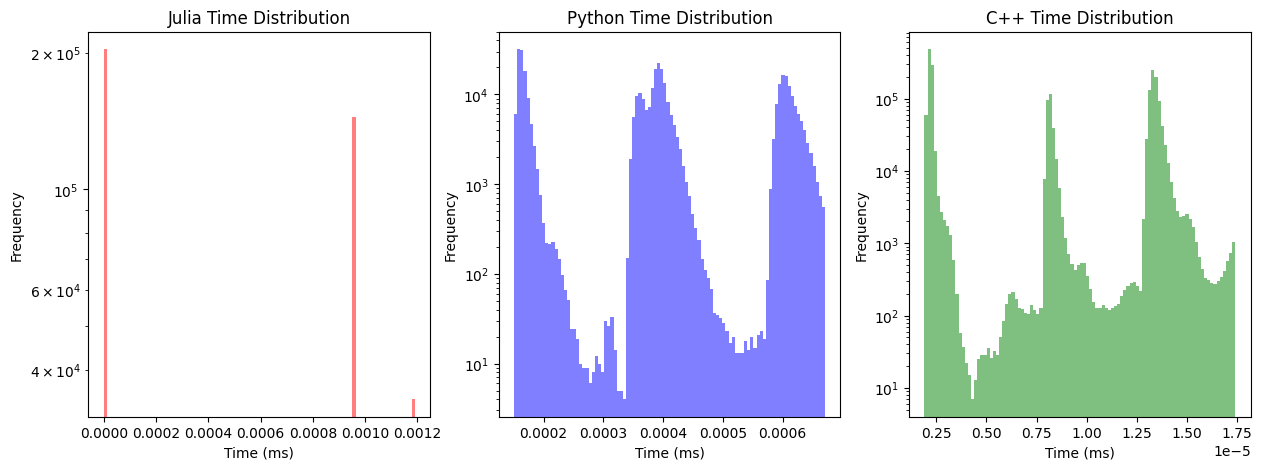

Julia Average Time:  0.000467183829393354
Python Average Time:  0.000390363428532558
C++ Average Time:  7.748859539863699e-06


In [5]:
# plot all read times 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(jl_df['time'], bins=100, log=True, alpha=0.5, color='red')
ax[0].set_title('Julia Time Distribution')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Frequency')

ax[1].hist(py_t_real['time'], bins=100, log=True, alpha=0.5, color='blue')
ax[1].set_title('Python Time Distribution')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Frequency')

ax[2].hist(cpp_t_real['time'], bins=100, log=True, alpha=0.5, color='green')
ax[2].set_title('C++ Time Distribution')
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Frequency')

plt.show()

# julia average 
print('Julia Average Time: ', np.mean(jl_df['time']))
print('Python Average Time: ', np.mean(py_t_real['time']))
print('C++ Average Time: ', np.mean(cpp_t_real['time']))

Python Average Overhead:  0.48277610071754395
C++ Average Overhead:  0.38653910880340925


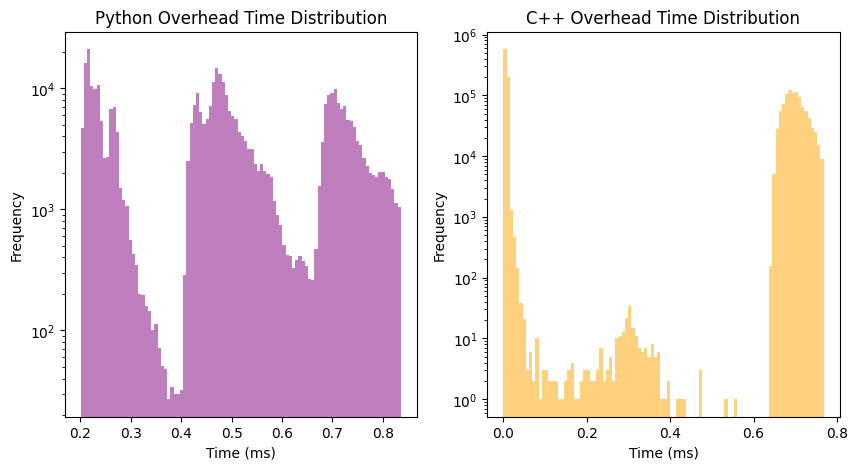

In [6]:
py_overhead = abs(py_t_real['time'] - py_df['time'])

cpp_overhead = abs(cpp_t_real['time'] - cpp_df['time'])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(py_overhead, bins=100, log=True, alpha=0.5, color='purple')
ax[0].set_title('Python Overhead Time Distribution')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Frequency')

ax[1].hist(cpp_overhead, bins=100, log=True, alpha=0.5, color='orange')
ax[1].set_title('C++ Overhead Time Distribution')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Frequency')

# print average overhead 
print('Python Average Overhead: ', np.mean(py_overhead))
print('C++ Average Overhead: ', np.mean(cpp_overhead))

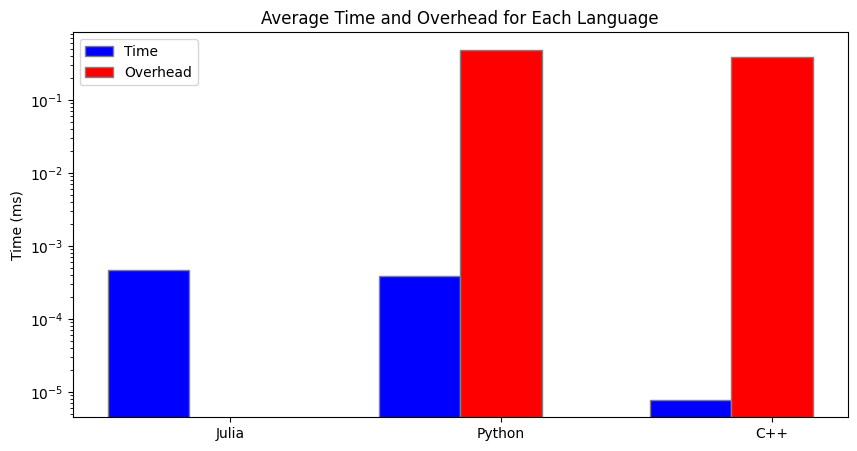

In [12]:
avrg_py_overhead = np.mean(py_overhead)
avrg_cpp_overhead = np.mean(cpp_overhead)
avrg_cpp_time = np.mean(cpp_t_real['time'])
avrg_py_time = np.mean(py_t_real['time'])
avrg_jl_time = np.mean(jl_df['time'])

# plot the average time and the overhead time for each language for cpp and jl plot as a bar graph on the same graph 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
langs = ['Julia', 'Python', 'C++']
times = [avrg_jl_time, avrg_py_time, avrg_cpp_time]
overheads = [0, avrg_py_overhead, avrg_cpp_overhead]
barWidth = 0.3
r1 = np.arange(len(langs))
r2 = [x + barWidth for x in r1]
ax.bar(r1, times, color='blue', width=barWidth, log=True, edgecolor='grey', label='Time')
ax.bar(r2, overheads, color='red', width=barWidth, log=True, edgecolor='grey', label='Overhead')
ax.set_xticks([r + barWidth for r in range(len(langs))])
ax.set_xticklabels(langs)
ax.set_title('Average Time and Overhead for Each Language')
ax.set_ylabel('Time (ms)')
ax.legend()
plt.show()

In [8]:
import pydot
import networkx as nx
import matplotlib.pyplot as plt
import pyvis.network as net

# Read the .dot file using pydot
dot_path = 'data/out.dot'
(pydot_graph,) = pydot.graph_from_dot_file(dot_path)

# conver to networkx ; parse the edge label `label="77.10%\n486645×"` get the number 
G = nx.nx_pydot.from_pydot(pydot_graph)
for u, v, d in G.edges(data=True):
    d['label'] = d.get('label', '') 

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

In [ ]:
print(len(G.nodes()))

: 

In [ ]:
import re
for n in G.nodes():
    G.nodes[n]['label'] = G.nodes[n]['label'].replace('\\n', ' ').replace('\n', ' ')
    
stat_finder = r".*\s(\d+.\d+)%\s\((\d+.\d+)%\)\s(\d+)"    
double_find = r".*\s+(\d+.\d+)%\s+\((\d+.\d+)%\)"
finder_3 = r".*\s+(\d+.\d+)%\s\(\\\s*(\d+.\d+)%\)\s+(\d+)"


: 

In [ ]:
from collections import defaultdict
call_map = defaultdict(tuple)

for n in G.nodes(data=True):
    # for edges going into this node 
    re_match = re.match(stat_finder, n[1]['label'])
    re_match2 = re.match(double_find, n[1]['label'])
    re_match3 = re.match(finder_3, n[1]['label'])
    if re_match is not None:
        call_map[n[1]['label']] = (float(re_match.group(1)), float(re_match.group(2)), int(re_match.group(3)))
    elif re_match2 is not None:
        call_map[n[1]['label']] = (float(re_match2.group(1)), float(re_match2.group(2)), 0)
    elif re_match3 is not None:
        call_map[n[1]['label']] = (float(re_match3.group(1)), float(re_match3.group(2)), int(re_match3.group(3))) 
    else: 
        print(n[1]['label'])

: 

In [ ]:
# sort callmap items by the number of calls

sorted_call_map = sorted(call_map.items(), key=lambda x: x[1][1], reverse=True)
for i in range(10):
    total_time = sorted_call_map[i][1][0]
    self_time = sorted_call_map[i][1][1]
    calls = sorted_call_map[i][1][2]
    print(f'total time: {total_time}, self time: {self_time}, calls: {calls} | fname: {sorted_call_map[i][0]}')

: 

In [ ]:
def total_self_time_aggregator(tuples) -> float:
    total_time = 0
    for t in tuples:
        total_time += t[1][0]
    return total_time

total_self_time_aggregator(sorted_call_map)

: 

In [ ]:
# divide functions into std:: jluna:: and other 
std_functions = []
jluna_functions = []
other_functions = []

for k, v in call_map.items():
    if 'std::' in k:
        std_functions.append((k, v))
    elif 'jluna::' in k:
        jluna_functions.append((k, v))
    else:
        other_functions.append((k, v))
        
print(total_self_time_aggregator(std_functions), total_self_time_aggregator(jluna_functions), total_self_time_aggregator(other_functions))
        
# sort by self time
std_functions = sorted(std_functions, key=lambda x: x[1][1], reverse=True)
jluna_functions = sorted(jluna_functions, key=lambda x: x[1][1], reverse=True)
other_functions = sorted(other_functions, key=lambda x: x[1][1], reverse=True)

# restrict to 99.9th percentile
std_functions = [x for x in std_functions if x[1][1] < np.percentile([x[1][1] for x in std_functions], 99.9)]
jluna_functions = [x for x in jluna_functions if x[1][1] < np.percentile([x[1][1] for x in jluna_functions], 99.9)]
other_functions = [x for x in other_functions if x[1][1] < np.percentile([x[1][1] for x in other_functions], 99.9)]
        
print(len(std_functions), len(jluna_functions), len(other_functions))
        
# 1 x 3 plot of self-time distribution for std, jluna, and other functions across all samples 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist([x[1][1] for x in std_functions], bins=100, alpha=0.5, color='red')
ax[0].set_title('std:: Functions')
ax[0].set_xlabel('Self Time (ms)')
ax[0].set_ylabel('Frequency')

ax[1].hist([x[1][1] for x in jluna_functions], bins=100, alpha=0.5, color='blue')
ax[1].set_title('jluna:: Functions')
ax[1].set_xlabel('Self Time (ms)')
ax[1].set_ylabel('Frequency')

ax[2].hist([x[1][1] for x in other_functions], bins=100, alpha=0.5, color='green')
ax[2].set_title('Other Functions')
ax[2].set_xlabel('Self Time (ms)')
ax[2].set_ylabel('Frequency')

fig.tight_layout()
plt.show()

: 

In [ ]:
# single plot which overlays the self times of std, jluna, and other functions
std_functions = [x for x in std_functions if x[1][1] < np.percentile([x[1][1] for x in std_functions], 99.9)]
jluna_functions = [x for x in jluna_functions if x[1][1] < np.percentile([x[1][1] for x in jluna_functions], 99.9)]
other_functions = [x for x in other_functions if x[1][1] < np.percentile([x[1][1] for x in other_functions], 99.9)]

# plt.hist([x[1][1] for x in std_functions], bins=100, alpha=0.5, color='red', label='std')
plt.hist([x[1][1] for x in jluna_functions], bins=100,  alpha=0.5, color='blue', label='jluna')
plt.hist([x[1][1] for x in other_functions], bins=100, alpha=0.5, color='green', label='Other')
plt.xlabel('Self Time (ms)')
plt.ylabel('Frequency')
plt.title('Self Time Distribution')
plt.legend()
plt.show()

: 

In [ ]:
# sort by self time
std_functions = sorted(std_functions, key=lambda x: x[1][1], reverse=True)
jluna_functions = sorted(jluna_functions, key=lambda x: x[1][1], reverse=True)
other_functions = sorted(other_functions, key=lambda x: x[1][1], reverse=True)
        
# 1 x 3 plot of self-time for std, jluna, and other functions
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar([x[0] for x in std_functions[:10]], [x[1][1] for x in std_functions[:10]], color='red')
ax[0].set_title('Self-Time % of std Functions')
ax[0].set_xlabel('Function Name')
ax[0].set_ylabel('Self-Time % (ms)')
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar([x[0] for x in jluna_functions[:10]], [x[1][1] for x in jluna_functions[:10]], color='blue')
ax[1].set_title('Self-Time % of jluna Functions')
ax[1].set_xlabel('Function Name')
ax[1].set_ylabel('Self-Time % (ms)')
ax[1].tick_params(axis='x', rotation=90)

ax[2].bar([x[0] for x in other_functions[:10]], [x[1][1] for x in other_functions[:10]], color='green')
ax[2].set_title('Self-Time % of Other Functions')
ax[2].set_xlabel('Function Name')
ax[2].set_ylabel('Self-Time (ms)')
ax[2].tick_params(axis='x', rotation=90)

plt.show()

: 